In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [258]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [259]:
home_owner = pd.get_dummies(df['person_home_ownership'], drop_first=True)
loan_intent = pd.get_dummies(df['loan_intent'], drop_first=True)
loan_grade = pd.get_dummies(df['loan_grade'], drop_first=True)
def_on_file = pd.get_dummies(df['cb_person_default_on_file'], drop_first=True)

df = pd.concat([df, home_owner, loan_intent, loan_grade, def_on_file], axis = 1)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,1,0,0,0,1,0,0,0,0,1


In [260]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'OTHER',
       'OWN', 'RENT', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL',
       'VENTURE', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'],
      dtype='object')

In [261]:
df = df[['person_age', 'person_income','person_emp_length','loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income','cb_person_cred_hist_length', 'OTHER',
       'OWN', 'RENT', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL',
       'VENTURE', 'B', 'C', 'D', 'E', 'F', 'G', 'Y']]
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1


In [262]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,0.003284,0.079310,...,0.186336,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001,0.057214,0.270226,...,0.389383,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           31686 non-null  float64
 3   loan_amnt                   32581 non-null  int64  
 4   loan_int_rate               29465 non-null  float64
 5   loan_status                 32581 non-null  int64  
 6   loan_percent_income         32581 non-null  float64
 7   cb_person_cred_hist_length  32581 non-null  int64  
 8   OTHER                       32581 non-null  uint8  
 9   OWN                         32581 non-null  uint8  
 10  RENT                        32581 non-null  uint8  
 11  EDUCATION                   32581 non-null  uint8  
 12  HOMEIMPROVEMENT             32581 non-null  uint8  
 13  MEDICAL                     325

C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

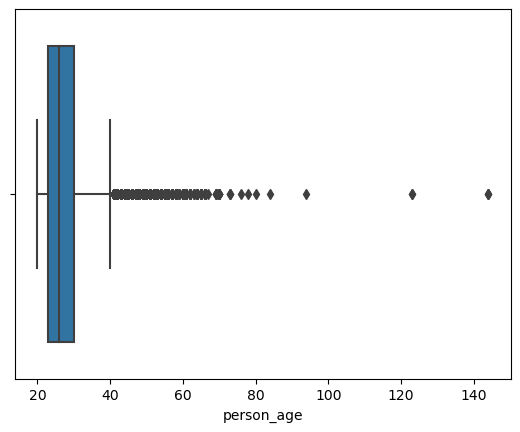

In [264]:
sns.boxplot(df['person_age'])

In [265]:
df.info() #There are null values in person employmentlength data and loan interest rate data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           31686 non-null  float64
 3   loan_amnt                   32581 non-null  int64  
 4   loan_int_rate               29465 non-null  float64
 5   loan_status                 32581 non-null  int64  
 6   loan_percent_income         32581 non-null  float64
 7   cb_person_cred_hist_length  32581 non-null  int64  
 8   OTHER                       32581 non-null  uint8  
 9   OWN                         32581 non-null  uint8  
 10  RENT                        32581 non-null  uint8  
 11  EDUCATION                   32581 non-null  uint8  
 12  HOMEIMPROVEMENT             32581 non-null  uint8  
 13  MEDICAL                     325

In [266]:
#In person employment rate data, there are 895 observations missing
df['person_emp_length'].isnull().sum()

#In loan interest rate data, there are 3116 observations missing
df['loan_int_rate'].isnull().sum()


3116

In [223]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'OTHER', 'OWN', 'RENT', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G', 'Y'],
      dtype='object')

In [267]:
plt.figure(figsize = (16,5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

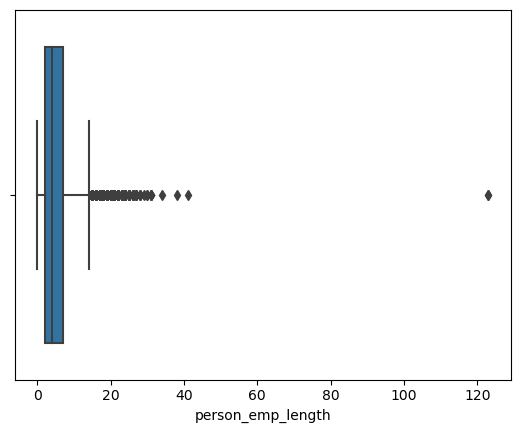

In [268]:
sns.boxplot(df['person_emp_length'])

In [269]:
((df['person_emp_length'].isnull()) & (df['loan_int_rate'].isnull())).sum()

68

In [270]:
df.index[(df['person_emp_length'].isnull()) & (df['loan_int_rate'].isnull())]

Int64Index([  379,  1388,  1395,  1651,  1698,  1998,  2030,  2221,  2966,
             3120,  3487,  3645,  3898,  4117,  4377,  4650,  4666,  5130,
             6139,  6149,  6884,  7572,  8654,  9375, 10524, 10654, 10688,
            12781, 13561, 13648, 14271, 15011, 15122, 15939, 16534, 16680,
            16823, 17904, 18506, 18975, 19034, 19205, 19377, 19452, 19542,
            20021, 20131, 20452, 20644, 20925, 21244, 21822, 21967, 22586,
            22838, 23184, 23405, 25417, 25767, 28956, 29261, 29473, 29805,
            30460, 30523, 31573, 31926, 31956],
           dtype='int64')

In [271]:
df.drop(df.index[(df['person_emp_length'].isnull()) & (df['loan_int_rate'].isnull())], inplace=True)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32513 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32513 non-null  int64  
 1   person_income               32513 non-null  int64  
 2   person_emp_length           31686 non-null  float64
 3   loan_amnt                   32513 non-null  int64  
 4   loan_int_rate               29465 non-null  float64
 5   loan_status                 32513 non-null  int64  
 6   loan_percent_income         32513 non-null  float64
 7   cb_person_cred_hist_length  32513 non-null  int64  
 8   OTHER                       32513 non-null  uint8  
 9   OWN                         32513 non-null  uint8  
 10  RENT                        32513 non-null  uint8  
 11  EDUCATION                   32513 non-null  uint8  
 12  HOMEIMPROVEMENT             32513 non-null  uint8  
 13  MEDICAL                     325

In [273]:
#In person employment rate data, there are 827 observations missing
df['person_emp_length'].isnull().sum()


827

In [274]:
#In loan interest rate data, there are 3048 observations missing
df['loan_int_rate'].isnull().sum()

3048

C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

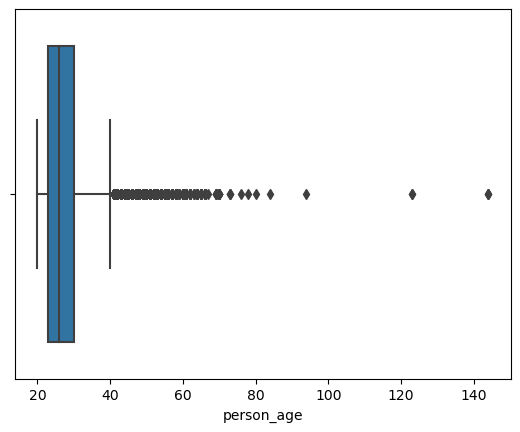

In [275]:
sns.boxplot(df['person_age'])

In [276]:
df[df['person_age']>60].count()

person_age                    70
person_income                 70
person_emp_length             69
loan_amnt                     70
loan_int_rate                 59
loan_status                   70
loan_percent_income           70
cb_person_cred_hist_length    70
OTHER                         70
OWN                           70
RENT                          70
EDUCATION                     70
HOMEIMPROVEMENT               70
MEDICAL                       70
PERSONAL                      70
VENTURE                       70
B                             70
C                             70
D                             70
E                             70
F                             70
G                             70
Y                             70
dtype: int64

In [277]:
df = df[df['person_age'] <= 60]

In [278]:
df['person_income'].describe()

iqr = 7.923600e+04 - 3.870000e+04

ll = 3.870000e+04 - 1.5 * iqr
ul = 7.923600e+04 + 1.5 * iqr

ul

140040.0

In [279]:
df = df[df['person_income']<=1200000]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32439 entries, 0 to 32579
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32439 non-null  int64  
 1   person_income               32439 non-null  int64  
 2   person_emp_length           31613 non-null  float64
 3   loan_amnt                   32439 non-null  int64  
 4   loan_int_rate               29403 non-null  float64
 5   loan_status                 32439 non-null  int64  
 6   loan_percent_income         32439 non-null  float64
 7   cb_person_cred_hist_length  32439 non-null  int64  
 8   OTHER                       32439 non-null  uint8  
 9   OWN                         32439 non-null  uint8  
 10  RENT                        32439 non-null  uint8  
 11  EDUCATION                   32439 non-null  uint8  
 12  HOMEIMPROVEMENT             32439 non-null  uint8  
 13  MEDICAL                     324

C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

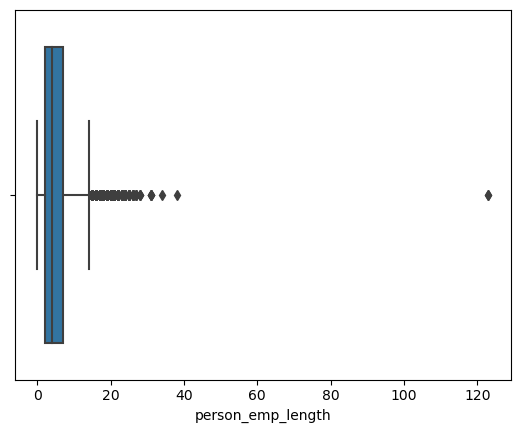

In [280]:
sns.boxplot(df['person_emp_length'])

In [281]:
df['person_emp_length'].describe()

count    31613.00000
mean         4.78629
std          4.12668
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max        123.00000
Name: person_emp_length, dtype: float64

In [282]:
iqr = 5

ul =  7.00000 + 1.5 * iqr
ul

14.5

In [283]:
df[df['person_emp_length']==30].count()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
OTHER                         0
OWN                           0
RENT                          0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
Y                             0
dtype: int64

In [284]:
df = df[df['person_emp_length']<=30]

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31605 entries, 1 to 32579
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31605 non-null  int64  
 1   person_income               31605 non-null  int64  
 2   person_emp_length           31605 non-null  float64
 3   loan_amnt                   31605 non-null  int64  
 4   loan_int_rate               28569 non-null  float64
 5   loan_status                 31605 non-null  int64  
 6   loan_percent_income         31605 non-null  float64
 7   cb_person_cred_hist_length  31605 non-null  int64  
 8   OTHER                       31605 non-null  uint8  
 9   OWN                         31605 non-null  uint8  
 10  RENT                        31605 non-null  uint8  
 11  EDUCATION                   31605 non-null  uint8  
 12  HOMEIMPROVEMENT             31605 non-null  uint8  
 13  MEDICAL                     316

In [286]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
count,31605.000000,3.160500e+04,31605.000000,31605.000000,28569.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,...,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000,31605.000000
mean,27.645214,6.620623e+04,4.773517,9653.811897,11.039688,0.215377,0.169602,5.767980,0.003386,0.076222,...,0.185793,0.168992,0.175510,0.321563,0.199494,0.112103,0.029964,0.007467,0.002025,0.177535
std,5.950341,4.847143e+04,4.000051,6327.601227,3.229170,0.411090,0.106243,3.969012,0.058088,0.265357,...,0.388946,0.374751,0.380409,0.467084,0.399626,0.315498,0.170490,0.086091,0.044955,0.382127
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.930000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12475.000000,13.480000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,1.200000e+06,28.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_int_rate'>

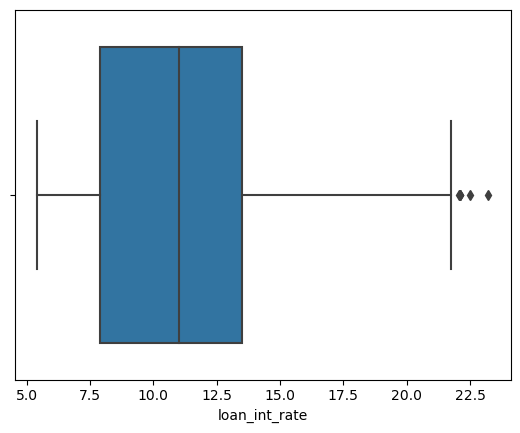

In [287]:
sns.boxplot(df['loan_int_rate'])

In [288]:
iqr = 13.480000 - 7.900000

ul = 13.480000 + 1.5 * iqr

ul

21.85

In [289]:
df[df['loan_int_rate']>ul].count()

person_age                    6
person_income                 6
person_emp_length             6
loan_amnt                     6
loan_int_rate                 6
loan_status                   6
loan_percent_income           6
cb_person_cred_hist_length    6
OTHER                         6
OWN                           6
RENT                          6
EDUCATION                     6
HOMEIMPROVEMENT               6
MEDICAL                       6
PERSONAL                      6
VENTURE                       6
B                             6
C                             6
D                             6
E                             6
F                             6
G                             6
Y                             6
dtype: int64

In [338]:
df = df[(df['loan_int_rate'] <= 21.85) & (df['loan_int_rate'].isnull() == False)]

In [339]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,4.0,20000,15.58,1,0.31,19,0,0,...,0,1,0,0,0,1,0,0,0,1
32575,52,64500,0.0,5000,11.26,0,0.08,20,0,0,...,0,0,0,1,0,0,0,0,0,0
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,0,...,0,1,0,0,0,0,0,0,0,0


In [341]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
count,28563.000000,2.856300e+04,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,...,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000
mean,27.632707,6.617415e+04,4.769422,9648.899800,11.037313,0.216399,0.169481,5.755033,0.003291,0.076708,...,0.184539,0.169905,0.174702,0.319644,0.199104,0.113328,0.030319,0.007282,0.001891,0.177922
std,5.931995,4.786819e+04,3.996609,6321.403235,3.225341,0.411796,0.106341,3.953439,0.057274,0.266132,...,0.387930,0.375556,0.379718,0.466347,0.399333,0.316999,0.171466,0.085026,0.043440,0.382454
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.941000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.581200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,1.200000e+06,28.000000,35000.000000,21.740000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [345]:
from sklearn.model_selection import train_test_split

df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'OTHER', 'OWN', 'RENT', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G', 'Y'],
      dtype='object')

In [348]:
X = df[['person_age','person_income','person_emp_length','loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_cred_hist_length','OTHER','OWN','RENT','EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G', 'Y']]

y = df['loan_status']

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [351]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

logmodel

LogisticRegression()

In [353]:
predictions = logmodel.predict(X_test)

In [354]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6714
           1       0.73      0.16      0.27      1855

    accuracy                           0.81      8569
   macro avg       0.77      0.57      0.58      8569
weighted avg       0.79      0.81      0.75      8569

0.8058116466332127
[[6602  112]
 [1552  303]]


In [356]:
df['loan_status'].describe()

count    28563.000000
mean         0.216399
std          0.411796
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [357]:
print(logmodel.coef_)

[[-5.76692789e-08 -4.05079255e-05 -2.92514992e-08  1.06383433e-04
   9.34911579e-08  2.58270750e-09 -1.03256109e-08  6.52525420e-11
  -3.91322416e-09  8.18483219e-09 -3.09437871e-09  1.81054719e-09
   1.55975144e-09 -1.34203890e-09 -3.68790569e-09 -5.82427385e-09
  -1.50068786e-09  1.08651567e-08  3.55394642e-09  1.03005629e-09
   3.79604142e-10  7.05656884e-09]]


In [358]:
print(logmodel.predict_proba)

<bound method LogisticRegression.predict_proba of LogisticRegression()>


In [359]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.342553
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                28563
Model:                          Logit   Df Residuals:                    28541
Method:                           MLE   Df Model:                           21
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.3442
Time:                        12:48:03   Log-Likelihood:                -9784.3
converged:                       True   LL-Null:                       -14919.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
person_age                    -0.0962      0.005    -18.471      0.000      

In [360]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'OTHER', 'OWN', 'RENT', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G', 'Y'],
      dtype='object')

In [362]:
X = df[['person_age', 'person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_cred_hist_length', 'OWN', 'RENT', 'EDUCATION',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G']]

y = df['loan_status']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)

logmodel.fit(X_train, y_train)

logmodel

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6714
           1       0.71      0.41      0.52      1855

    accuracy                           0.83      8569
   macro avg       0.78      0.68      0.71      8569
weighted avg       0.82      0.83      0.82      8569

0.8349865795308671
[[6403  311]
 [1103  752]]
